#Qestion 2

## Section A: Long Short-Term Memory (LSTM): Mathematical Intuition and Example

### Introduction to RNN and LSTM

Recurrent Neural Networks (RNNs) are designed to process sequences of data by maintaining a hidden state that captures information about previous elements in the sequence. However, standard RNNs suffer from the vanishing gradient problem, making it difficult to capture long-term dependencies. Long Short-Term Memory (LSTM) networks were introduced to address this issue by incorporating gating mechanisms that regulate the flow of information.


Mounted at /content/drive


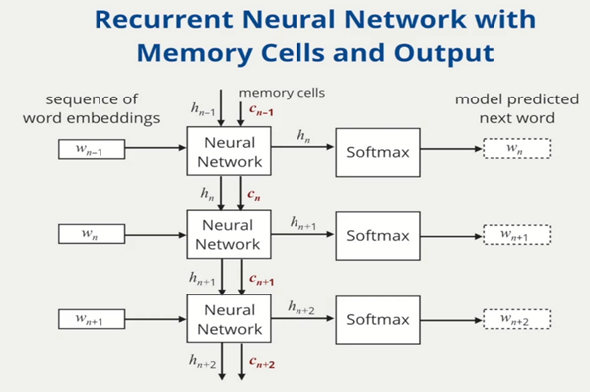

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename="/content/drive/MyDrive/AI-SUMMER-2024/ai-project-3/q2/overall-lstm.png")

#Source: introduction to machine learning, duke university.


### LSTM Architecture

An LSTM unit consists of several components:
- **Cell State ($(C_t$))**: The long-term memory of the network.
- **Hidden State ($(h_t$))**: The short-term memory or output at each time step.
- **Forget Gate ($(f_t$))**: Decides what information to discard from the cell state.
- **Input Gate ($(i_t$))**: Decides what new information to add to the cell state.
- **Output Gate ($(o_t$))**: Decides what information to output from the hidden state.

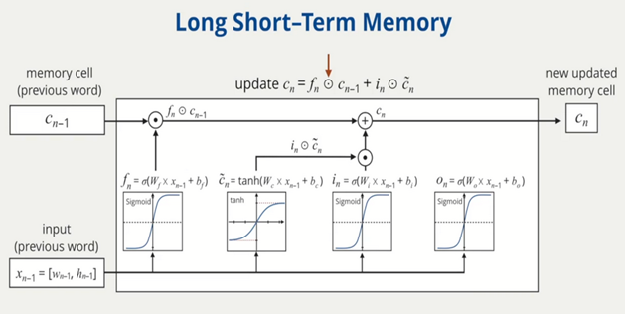

In [3]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/AI-SUMMER-2024/ai-project-3/q2/inside-block-lstm.png",height = 500, width = 850)

#Source: introduction to machine learning, duke university.

### Mathematical Formulation

Let's denote:
- $(x_t$): Input at time step $(t$)
- $(h_{t-1}$): Hidden state from the previous time step
- $(C_{t-1}$): Cell state from the previous time step
- $(W$) and $(b$): Weights and biases for the gates

The equations governing the LSTM are as follows:

1. **Forget Gate**:

   $[
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $]

   Here, $(\sigma$) is the sigmoid activation function.

2. **Input Gate**:

   $[
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $]

   $[
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $]

   $[
   C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
   $]

   Here, $(\tanh$) is the hyperbolic tangent function.

3. **Output Gate**:
   $[
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $]

   $[
   h_t = o_t \cdot \tanh(C_t)
   $]

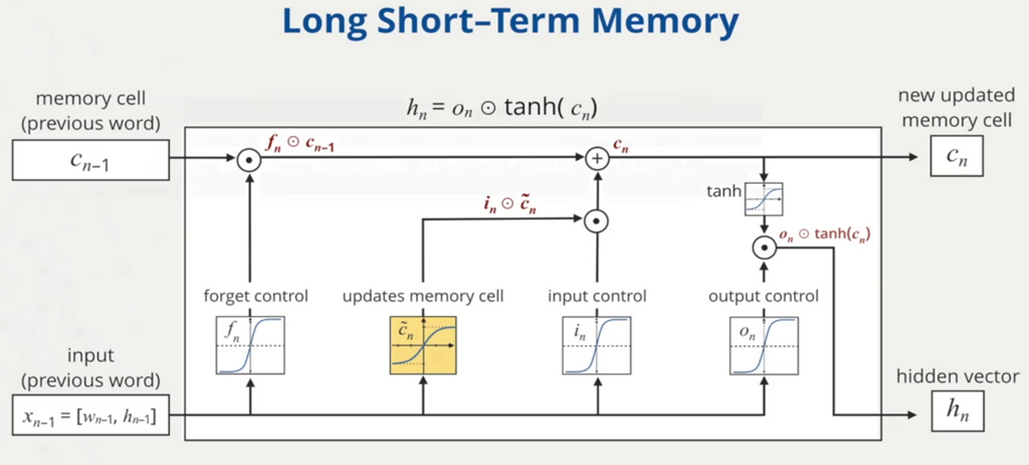

In [4]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/AI-SUMMER-2024/ai-project-3/q2/block-lstm.png",height = 500, width = 850)

#Source: introduction to machine learning, duke university.

What we mean by multiply:

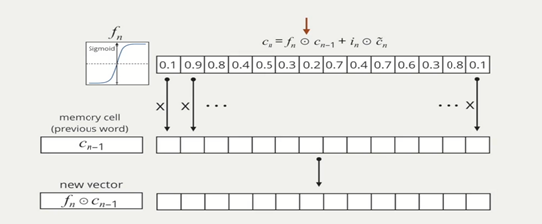

In [5]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/AI-SUMMER-2024/ai-project-3/q2/multiply-lstm.png",height = 500, width = 850)

#Source: introduction to machine learning, duke university.

### Example

Let's walk through an example with a sequence of inputs: $(x_1, x_2, x_3$).

1. **Initialization**:

   - $(h_0 = 0$)
   - $(C_0 = 0$)

2. **Time Step $(t=1$)**:
   - Input: $(x_1$)
   - Calculate forget gate: $(f_1 = \sigma(W_f \cdot [0, x_1] + b_f)$)
   - Calculate input gate: $(i_1 = \sigma(W_i \cdot [0, x_1] + b_i)$)
   - Calculate candidate cell state: $(\tilde{C}_1 = \tanh(W_C \cdot [0, x_1] + b_C)$)
   - Update cell state: $(C_1 = f_1 \cdot 0 + i_1 \cdot \tilde{C}_1 = i_1 \cdot \tilde{C}_1$)
   - Calculate output gate: $(o_1 = \sigma(W_o \cdot [0, x_1] + b_o)$)
   - Update hidden state: $(h_1 = o_1 \cdot \tanh(C_1)$)

3. **Time Step $(t=2$)**:
   - Input: $(x_2$)
   - Calculate forget gate: $(f_2 = \sigma(W_f \cdot [h_1, x_2] + b_f)$)
   - Calculate input gate: $(i_2 = \sigma(W_i \cdot [h_1, x_2] + b_i)$)
   - Calculate candidate cell state: $(\tilde{C}_2 = \tanh(W_C \cdot [h_1, x_2] + b_C)$)
   - Update cell state: $(C_2 = f_2 \cdot C_1 + i_2 \cdot \tilde{C}_2$)
   - Calculate output gate: $(o_2 = \sigma(W_o \cdot [h_1, x_2] + b_o)$)
   - Update hidden state: $(h_2 = o_2 \cdot \tanh(C_2)$)

4. **Time Step $(t=3$)**:
   - Input: $(x_3$)
   - Calculate forget gate: $(f_3 = \sigma(W_f \cdot [h_2, x_3] + b_f)$)
   - Calculate input gate: $(i_3 = \sigma(W_i \cdot [h_2, x_3] + b_i)$)
   - Calculate candidate cell state: $(\tilde{C}_3 = \tanh(W_C \cdot [h_2, x_3] + b_C)$)
   - Update cell state: $(C_3 = f_3 \cdot C_2 + i_3 \cdot \tilde{C}_3$)
   - Calculate output gate: $(o_3 = \sigma(W_o \cdot [h_2, x_3] + b_o)$)
   - Update hidden state: $(h_3 = o_3 \cdot \tanh(C_3)$)



### Example with Numerical Values

#### Initialization

1. **Weights and Biases**:

   $[
   W_f = W_i = W_C = W_o = \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix}, \quad b_f = b_i = b_C = b_o = \begin{bmatrix}  0 \\ 0  \end{bmatrix}
   $]

2. **Initial Hidden State and Cell State**:

   $[
   h_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad C_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
   $]

3. **Inputs**:

   $[
   w_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad w_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad w_3 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
   $]

#### Time Step \(t=1\)

1. **Input**:

   $[
   x_1 = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0  \end{bmatrix}
   $]

2. **Forget Gate**:

   $[
   f_1 = \sigma(W_f \cdot [h_0, x_1] + b_f) = \sigma \left( \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} \right) = \sigma \left( \begin{bmatrix} 0 \\ 0.5 \end{bmatrix} \right) = \begin{bmatrix}  0 \\ 0.62245933 \end{bmatrix}
   $]

3. **Input Gate**:

   $[
   i_1 = \sigma(W_i \cdot [h_0, x_1] + b_i) = \sigma \left( \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} \right) = \sigma \left( \begin{bmatrix} 0 \\ 0.5 \end{bmatrix} \right) = \begin{bmatrix}  0 \\ 0.62245933 \end{bmatrix}
   $]

4. **Candidate Cell State**:

   $[
   \tilde{C}_1 = \tanh(W_C \cdot [h_0, x_1] + b_C) = \tanh \left( \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0 \\ 0.5 \end{bmatrix} \right) = \begin{bmatrix}  0 \\ 0.46211716  \end{bmatrix}
   $]

5. **Cell State**:

   $[
   C_1 = f_1 \cdot C_0 + i_1 \cdot \tilde{C}_1 = \begin{bmatrix} 0 \\ 0.62245933 \end{bmatrix} \cdot \begin{bmatrix}  0 \\ 0 \end{bmatrix} + \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix} \cdot \begin{bmatrix}   0 \\ 0.46211716  \end{bmatrix} = \begin{bmatrix}  0 \\ 0.28718524  \end{bmatrix}
   $]

6. **Output Gate**:

   $[
   o_1 = \sigma(W_o \cdot [h_0, x_1] + b_o) = \sigma \left( \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} \right) = \sigma \left( \begin{bmatrix} 0 \\ 0.5 \end{bmatrix} \right) = \begin{bmatrix}  0 \\ 0.62245933 \end{bmatrix}$

7. **Hidden State**:

   $[
   h_1 = o_1 \cdot \tanh(C_1) = \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix} \cdot \tanh \left( \begin{bmatrix}  0 \\ 0.28718524  \end{bmatrix} \right) = \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix} \cdot \begin{bmatrix}  0 \\ 0.27969371  \end{bmatrix} = \begin{bmatrix}  0 \\ 0.17369373  \end{bmatrix}
   $]

#### Time Step \(t=2\)

1. **Input**:

   $[
   x_2 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
   $]

2. **Forget Gate**: $...$

### Back Propegation:

- **Weights and Biases**:
  $[
  W_f = W_i = W_C = W_o = \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix}, \quad b_f = b_i = b_C = b_o = \begin{bmatrix} 0 \\ 0  \end{bmatrix}
  $]

- **Initial Hidden State and Cell State**:
  $[
  h_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad C_0 = \begin{bmatrix} 0 \\ 0  \end{bmatrix}
  $]

- **Inputs**:
  $[
  x_1 = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}
  $]

- **Outputs from Forward Pass at \( t=1 \)**:
  $[
  f_1 = \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix}, \quad i_1 = \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix}, \quad \tilde{C}_1 = \begin{bmatrix}  0 \\ 0.46211716  \end{bmatrix}, \quad C_1 = \begin{bmatrix}  0 \\ 0.28718524  \end{bmatrix}, \quad o_1 = \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix}, \quad h_1 = \begin{bmatrix}  0 \\ 0.17369373  \end{bmatrix}
  $]

### Back Propagation Through Time (BPTT) Step:

To compute gradients for the LSTM parameters $( W_f, W_i, W_C, W_o $) and $( b_f, b_i, b_C, b_o $), we proceed as follows:

1. **Output Gate $( o_1 $) and Hidden State $( h_1 $) Gradient Calculation**:
   $[
   \frac{\partial h_1}{\partial o_1} = \tanh(C_1) = \begin{bmatrix}  0 \\ 0.27969371  \end{bmatrix}
   $]
   $[
   \frac{\partial h_1}{\partial o_1} = \begin{bmatrix} 0 \\ 0.27969371  \end{bmatrix} \quad \text{(element-wise multiplication)}
   $]

2. **Gradient of Loss $( \mathcal{L} $) w.r.t. $( h_1 $)**:
   Let's assume $( \frac{\partial \mathcal{L}}{\partial h_1} = \begin{bmatrix} \frac{\partial \mathcal{L}}{\partial h_1[1]} \\ \frac{\partial \mathcal{L}}{\partial h_1[2]}  \end{bmatrix} $).

3. **Gradient of Loss $( \mathcal{L} $) w.r.t. $( o_1 $)**:
   $[
   \frac{\partial \mathcal{L}}{\partial o_1} = \frac{\partial \mathcal{L}}{\partial h_1} \cdot \frac{\partial h_1}{\partial o_1} = \begin{bmatrix} \frac{\partial \mathcal{L}}{\partial h_1[1]} \\ \frac{\partial \mathcal{L}}{\partial h_1[2]}  \end{bmatrix} \cdot \begin{bmatrix}  0 \\ 0.27969371  \end{bmatrix} = \begin{bmatrix}  0 \\ \frac{\partial \mathcal{L}}{\partial h_1[2]} \cdot 0.27969371  \end{bmatrix}
   $]

4. **Gradient of Loss $( \mathcal{L} $) w.r.t. $( C_1 $)**:
   $[
   \frac{\partial \mathcal{L}}{\partial C_1} = \frac{\partial \mathcal{L}}{\partial h_1} \cdot o_1 \cdot (1 - \tanh^2(C_1)) = \begin{bmatrix} \frac{\partial \mathcal{L}}{\partial h_1[1]} \\ \frac{\partial \mathcal{L}}{\partial h_1[2]}  \end{bmatrix} \cdot \begin{bmatrix}  0 \\ 0.62245933  \end{bmatrix} \cdot (1 - \begin{bmatrix}  0 \\ 0.28718524  \end{bmatrix}) = \begin{bmatrix}  0 \\ \frac{\partial \mathcal{L}}{\partial h_1[2]} \cdot 0.36528372  \end{bmatrix}
   $]

5. **Gradient of Loss $( \mathcal{L} $) w.r.t. $( f_1 $), $( i_1 $), $( \tilde{C}_1 $)**:
   - Compute $( \frac{\partial \mathcal{L}}{\partial f_1} $), $( \frac{\partial \mathcal{L}}{\partial i_1} $), and $( \frac{\partial \mathcal{L}}{\partial \tilde{C}_1} $) similarly using $( C_0 $), $( \tilde{C}_1 $), and $( i_1 $).

6. **Gradient of Loss $( \mathcal{L} $) w.r.t. $( W_f, W_i, W_C, W_o $) and $ b_f, b_i, b_C, b_o $)**:
   - Update each weight matrix $( W $) and bias vector $( b $) using the computed gradients and a learning rate.


Refrences:

(1) introduction to machinge learning, duke university, Coursera.

(2) Stuart Russell and Peter Norvig - Artificial Intelligence_ A Modern Approach-Pearson (2020)

<hr>

## Section B: Explaining And improving RNN, GRU And LSTM Models.

#**1.Import libraries**

In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


from zipfile import ZipFile
import os

from google.colab import drive
drive.mount('/content/drive')

with ZipFile('/content/drive/MyDrive/AI-SUMMER-2024/ai-project-3/q2/jena_climate_2009_2016.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/RNN-LSTMN')



Mounted at /content/drive


#**2.Import our data.**

In [2]:
csv_path = "/content/drive/MyDrive/RNN-LSTMN/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

#**3. The next step is to delete all columns other than the temperature, as we are building a univariate model. Keeping only the temperature data.**

In [3]:
df = df[['T (degC)']]

#**4. We apply the min-max scaler.**

In [4]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

# **5. We prepare our data and convert the list of lists to numpy array.We need to split the data into a shape in which we have sequences of past data and sequences of future data. We want to predict 72 steps into the future, and we’ll use 3*72 steps into the past. This is an arbitrary choice. You can try out using more or less past data.**

In [5]:
ylist = list(df['T'])

#change
n_future = 64
n_past = 4*64
total_period = 5*64

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1



X_new = np.array(X_new)
y_new = np.array(y_new)

#**6.We do train test split.**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state=42)

In [7]:
X_train.shape

(378207, 256)

#**7.It takes a long time to run this model. The batch size of 2000 is provided for demonstration purposes. But you need to put a much smaller batch size. Note that The SimpleRNN layer needs an input format that is 3D, and the shape has to correspond to (n_samples, n_timesteps, n_features). This can be obtained using reshape.**

In [8]:
#change
batch_size = 500

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

In [27]:
# from IPython.display import Image
# Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-NB-1.jpg', width=900,height=900)

#**8.We parameterize a small network with SimpleRNN.**
Line 1: -------
Line 2: -------
Line 3:-------

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 256, 8)            80        
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 256, 8)            136       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 64)                576       
                                                                 
Total params: 928 (3.62 KB)
Trainable params: 928 (3.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
606/606 [==============================] - 128s 206ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - val_loss: 0.0422 - val_mean_absolute_er

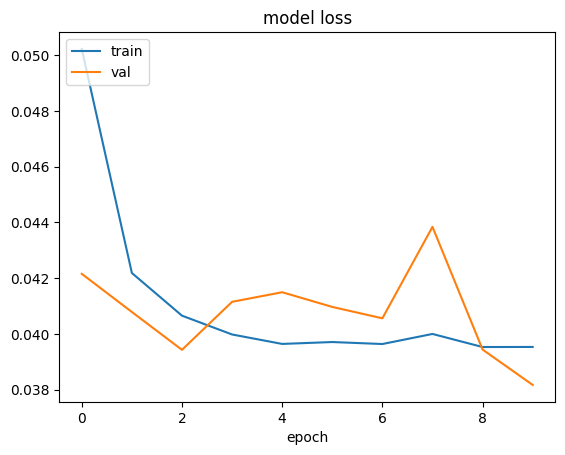

In [12]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences = True),
  SimpleRNN(8, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          #change
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
print(r2_score(preds, y_test))

0.7820056497588846


In [1]:
# from IPython.display import Image
# Image(filename='/content/drive/MyDrive/RNN-LSTM/RNN-NB-2.jpg', width=900,height=900)

#**9.A simple architecture with 1 Gated Recurrent Unit (GRU) layer.**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 64)                576       
                                                                 
Total params: 840 (3.28 KB)
Trainable params: 840 (3.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
606/606 [==============================] - 93s 149ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439
Epoch 2/5
606/606 [==============================] - 90s 148ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285
Epoch 3/5
606/606 [==============================] - 86s 142ms/step - loss: 0.0277 - mea

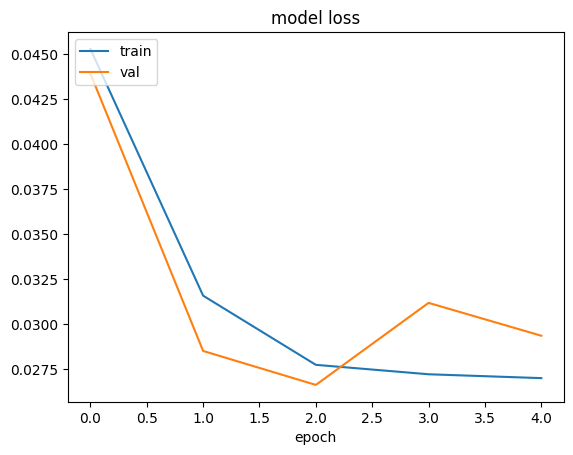

In [17]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
print(r2_score(preds, y_test))

0.9198416694490721


#**10.This is a  more complex network with three layers of Gated Recurrent Unit (GRU).**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256, 10)           390       
                                                                 
 gru_1 (GRU)                 (None, 256, 10)           660       
                                                                 
 gru_2 (GRU)                 (None, 10)                660       
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
Total params: 2414 (9.43 KB)
Trainable params: 2414 (9.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
606/606 [==============================] - 325s 520ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - val_loss: 0.0442 - val_mean_absolute_err

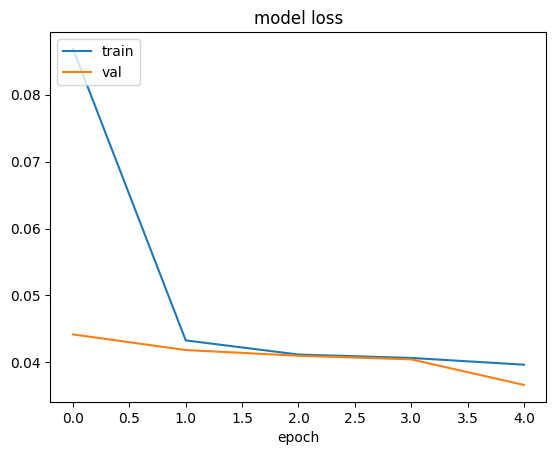

In [10]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(10, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(10, activation='tanh', return_sequences=True),
    GRU(10, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)



plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
print(r2_score(preds, y_test))

0.823129492829044


#**NOTE 2: In Part II, you must explain all the codes line by line. You should also improve the Train Score: 14.93 RMSE and Test Score: 46.19 RMSE of the model.**

#**Part II**
#**In this part, we will employ LSTM.This section uses the stock market data(SP500).**

#**1. Import libraries.**

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. We normalize the dataset and do train and test split.**

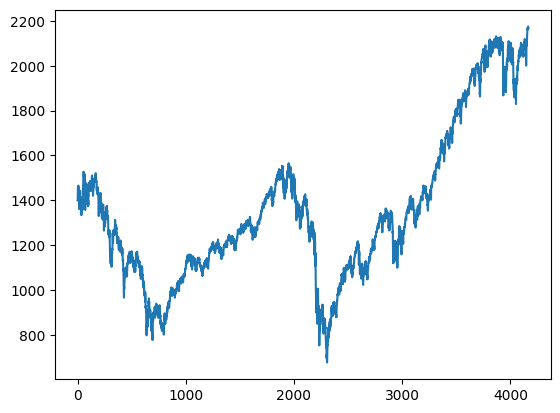

2791 1376


In [2]:
dataset = pandas.read_csv('/content/drive/MyDrive/AI-SUMMER-2024/ai-project-3/q2/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [3]:
print(dataset)

[[0.48240909]
 [0.48420417]
 [0.48509838]
 ...
 [0.99562893]
 [0.99609603]
 [0.99436106]]


# **3. We convert an array of values into a timeseries data.**

In [4]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [25]:
#change
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
trainX.shape

(2785, 5)

# **4. We reshape input to be [samples, time steps, features].**

In [27]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# **5.We create and fit the LSTM network.**

In [28]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 3s - loss: 0.0111 - 3s/epoch - 10ms/step
Epoch 2/100
279/279 - 1s - loss: 3.0804e-04 - 984ms/epoch - 4ms/step
Epoch 3/100
279/279 - 1s - loss: 2.1761e-04 - 1s/epoch - 4ms/step
Epoch 4/100
279/279 - 1s - loss: 2.0936e-04 - 939ms/epoch - 3ms/step
Epoch 5/100
279/279 - 1s - loss: 2.0182e-04 - 1s/epoch - 4ms/step
Epoch 6/100
279/279 - 1s - loss: 1.9254e-04 - 990ms/epoch - 4ms/step
Epoch 7/100
279/279 - 1s - loss: 1.8498e-04 - 664ms/epoch - 2ms/step
Epoch 8/100
279/279 - 1s - loss: 1.7504e-04 - 708ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 1.6592e-04 - 654ms/epoch - 2ms/step
Epoch 10/100
279/279 - 1s - loss: 1.5937e-04 - 687ms/epoch - 2ms/step
Epoch 11/100
279/279 - 1s - loss: 1.5489e-04 - 684ms/epoch - 2ms/step
Epoch 12/100
279/279 - 1s - loss: 1.5010e-04 - 669ms/epoch - 2ms/step
Epoch 13/100
279/279 - 1s - loss: 1.4441e-04 - 728ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.4414e-04 - 810ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.3746e

#**6.We rescale predicted values and compute the root mean squared error.**

In [29]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

43/43 [==============================] - 0s 2ms/step
Train Score: 15.77 RMSE
Test Score: 21.96 RMSE


# **7. We shift train and test predictions for plotting and plot baseline and predictions.The part in orange is the training data, the part in blue is the test data, and the part in green is the predicted output.**

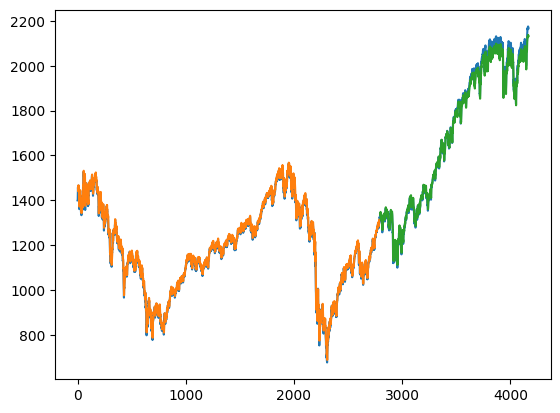

In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#**References:**
#**[1] Advanced Forecasting with Python: With State-of-the-Art-Models Including LSTMs, Facebook’s Prophet, and Amazon’s DeepAR, Joos Korstanje, July 2021.**
#**[2]. Deep Learning: Recurrent Neural Networks with Python, AI Sciences, 2021.**
#**[3]. Deep Learning with Applications Using Python : Chatbots and Face, Object, and Speech Recognition With TensorFlow and Keras, Navin Kumar Manaswi, 2018.**
#**[4]. Machine Vision, GANs, and Deep Reinforcement Learning, Jon Krohn, 2020.**
#**[5]. Generating a New Reality: From Autoencoders and Adversarial Networks to Deepfakes, Micheal Lanham, 2021.**
#**[6].Hands-On Mathematics for Deep Learning, Jay Dawani, 2020**
